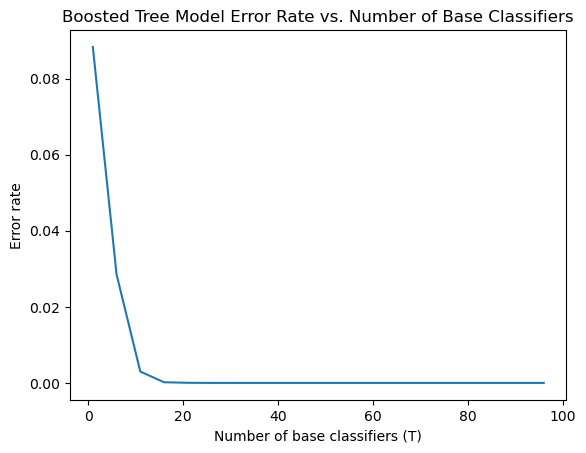

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

def boosted_classification_tree(X, y, T, max_depth):
    """
    Implements the AdaBoost algorithm using decision trees as base classifiers for binary classification tasks.
    """
    n = len(X)
    w = np.ones(n) / n  # Initialize weights uniformly
    base_classifiers = []  # List to store base classifiers
    alphas = []  # List to store alpha values
    errors = []  # List to store error rates

    for t in range(T):
        G_t = DecisionTreeClassifier(max_depth=max_depth)  # Base classifier: decision tree
        G_t.fit(X, y, sample_weight=w)  # Fit base classifier using current weights

        y_pred = G_t.predict(X)  # Predictions of base classifier
        err_t = np.sum(w[y != y_pred]) / np.sum(w)  # Compute error of base classifier

        alpha_t = 0.5 * np.log((1 - err_t) / err_t)  # Compute alpha value
        w = np.array(w)  # Convert w to NumPy array
        w *= np.exp(-alpha_t * y * y_pred)  # Update weights
        w /= np.sum(w)  # Normalize weights

        base_classifiers.append(G_t)  # Append base classifier to list of base classifiers
        alphas.append(alpha_t)  # Append alpha value to list of alpha values
        errors.append(err_t)  # Append error rate to list of error rates

    return base_classifiers, alphas, errors

# Load mushroom dataset
mushroom_data = pd.read_csv('/kaggle/input/mushroom-classification/mushrooms.csv')

# Drop 'veil-type' feature
mushroom_data = mushroom_data.drop('veil-type', axis=1)

# Convert categorical features to numerical
le = LabelEncoder()
mushroom_data = mushroom_data.apply(le.fit_transform)  # Apply LabelEncoder to X

# Split the dataset into training and testing sets
X = mushroom_data.iloc[:, 1:]
y = mushroom_data.iloc[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

T_values = list(range(1, 101, 5))  # T values to iterate over
max_depth = 2   # Maximum depth of decision trees
errors = []  # List to store error rates for each T value

# Fit boosted tree models with different T values and evaluate their accuracy on the test set
for T in T_values:
    base_classifiers, alphas, err = boosted_classification_tree(X_train, y_train, T, max_depth)
    errors.append(err[-1])  # Append error rate of the last base classifier (after T iterations)

# Plot errors as a function of T
plt.plot(T_values, errors)
plt.xlabel('Number of base classifiers (T)')
plt.ylabel('Error rate')
plt.title('Boosted Tree Model Error Rate vs. Number of Base Classifiers')
plt.show()



The error rate appears to go down as T, the number of base classifier, grows. It looks like after T=10, the error rate is less than 1% which is very good.